##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get started with the Gemini API: Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/get-started/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.

## Setup

### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

### Import packages

Import the necessary packages.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

참고: 사용 가능한 모델에 대한 자세한 정보(기능 및 요율 제한 포함)는 [Gemini 모델](https://ai.google.dev/models/gemini)을 참조하세요. 요율 제한 증가를 요청할 수 있는 옵션도 있습니다. Gemini-Pro 모델의 요율 제한은 분당 60회 요청(RPM)입니다.

`genai` 패키지는 PaLM 모델 패밀리도 지원하지만, `generateContent` 메서드의 일반적인 멀티모달 기능은 Gemini 모델만 지원합니다.

## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [ ]:
model = genai.GenerativeModel('gemini-pro')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a> method:

`generate_content` 메서드는 기본 모델이 지원하는 대로 다양한 사용 사례를 처리할 수 있습니다. 사용 가능한 모델은 입력으로 텍스트와 이미지만 지원하며, 출력으로는 텍스트만 지원합니다.

가장 간단한 경우에는 <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a> 메서드에 프롬프트 문자열을 전달할 수 있습니다.

In [ ]:
%%time
response = model.generate_content("please explain about making hamburger")

CPU times: user 135 ms, sys: 12.6 ms, total: 148 ms
Wall time: 10.2 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

간단한 경우에는 `response.text` 접근자만으로 충분합니다. 서식이 있는 Markdown 텍스트를 표시하려면 `to_markdown` 함수를 사용하세요.

In [ ]:
to_markdown(response.text)

> **Ingredients:**
> 
> **For the patties:**
> - 1 pound ground beef (80/20 ratio)
> - 1/4 cup chopped onion
> - 1/4 cup bread crumbs
> - 1 egg
> - 1 tablespoon Worcestershire sauce
> - 1/2 teaspoon salt
> - 1/4 teaspoon black pepper
> 
> **For the assembly:**
> - Hamburger buns
> - Lettuce
> - Tomato
> - Onion
> - Pickles
> - Cheese (optional)
> - Condiments (such as ketchup, mustard, mayonnaise)
> 
> **Instructions:**
> 
> **1. Make the patties:**
> - In a large bowl, combine the ground beef, onion, bread crumbs, egg, Worcestershire sauce, salt, and pepper. Mix well until the ingredients are evenly distributed.
> - Divide the mixture into equal portions (4-6 patties). Shape each portion into a patty about 1/2 inch thick and 3 inches wide.
> - Make a slight indentation in the center of each patty to prevent them from puffing up while cooking.
> 
> **2. Cook the patties:**
> - Heat a grill or grill pan over medium heat.
> - Grill the patties for 4-5 minutes per side for medium-rare, 5-6 minutes per side for medium, or 6-7 minutes per side for medium-well.
> - Use a meat thermometer to ensure the internal temperature reaches your desired doneness: 145°F (63°C) for medium-rare, 160°F (71°C) for medium, or 165°F (74°C) for medium-well.
> - Let the patties rest for 5-10 minutes before assembling the burgers to allow the juices to redistribute.
> 
> **3. Assemble the burgers:**
> - Spread your preferred condiments on the bottom bun.
> - Add the lettuce, tomato, onion, and pickles.
> - Place the patty on top, followed by the cheese (if using).
> - Add the top bun and serve immediately.
> 
> **Tips:**
> 
> * For a more flavorful burger, use a higher-quality ground beef (90/10 or 85/15).
> * Don't overmix the patty mixture, as this can make the burgers tough.
> * Be careful not to overcook the patties, as they will become dry and tough.
> * Toast the buns for a slightly crispy texture.
> * Experiment with different toppings and condiments to create your own unique burger variations.

If the API failed to return a result, use `GenerateContentResponse.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

API가 결과를 반환하지 못했다면, `GenerateContentResponse.prompt_feedback`를 사용하여 프롬프트에 대한 안전 문제로 차단되었는지 확인하세요.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/ai/generativelanguage/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

단일 프롬프트에 대해 Gemini는 여러 가능한 응답을 생성할 수 있습니다. 이러한 가능한 응답을 `candidates`라고 하며, 이 중 가장 적합한 것을 응답으로 선택할 수 있습니다.

<a href="https://ai.google.dev/api/python/google/ai/generativelanguage/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>를 사용하여 응답 후보를 확인할 수 있습니다.

In [ ]:
response.candidates

[content {
  parts {
    text: "**Ingredients:**\n\n**For the patties:**\n- 1 pound ground beef (80/20 ratio)\n- 1/4 cup chopped onion\n- 1/4 cup bread crumbs\n- 1 egg\n- 1 tablespoon Worcestershire sauce\n- 1/2 teaspoon salt\n- 1/4 teaspoon black pepper\n\n**For the assembly:**\n- Hamburger buns\n- Lettuce\n- Tomato\n- Onion\n- Pickles\n- Cheese (optional)\n- Condiments (such as ketchup, mustard, mayonnaise)\n\n**Instructions:**\n\n**1. Make the patties:**\n- In a large bowl, combine the ground beef, onion, bread crumbs, egg, Worcestershire sauce, salt, and pepper. Mix well until the ingredients are evenly distributed.\n- Divide the mixture into equal portions (4-6 patties). Shape each portion into a patty about 1/2 inch thick and 3 inches wide.\n- Make a slight indentation in the center of each patty to prevent them from puffing up while cooking.\n\n**2. Cook the patties:**\n- Heat a grill or grill pan over medium heat.\n- Grill the patties for 4-5 minutes per side for medium-rare, 5

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

기본적으로 모델은 전체 생성 프로세스를 완료한 후 응답을 반환합니다. 응답이 생성되는 대로 스트리밍하여 모델이 응답 청크를 생성할 때마다 청크를 반환합니다.

응답을 스트리밍하려면 <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>을 사용하세요.

In [ ]:
%%time
response = model.generate_content("please explain about making hamburger", stream=True)

CPU times: user 102 ms, sys: 10.1 ms, total: 112 ms
Wall time: 8.22 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

**Ingredients:**

* Ground beef (80/20 recommended)

________________________________________________________________________________
* Salt and pepper
* Hamburger buns
* Toppings of your choice (e.g., lettuce, tomato, onion, cheese, ketchup, mustard)
________________________________________________________________________________


**Instructions:**

**1. Season the Ground Beef:**
* In a large bowl, combine the ground beef, salt, and pepper to taste. Mix well to distribute the seasonings evenly.

**2. Form the Patties:**
* Divide the seasoned ground beef into equal portions (about 4-
________________________________________________________________________________
6 patties).
* Shape each portion into a patty about 1/2-inch thick. Make a slight indentation in the center of each patty to prevent it from doming during cooking.

**3. Preheat the Grill or Pan:**
* If grilling, preheat the grill to medium-high (400-450°F).
* If using a pan, heat a non-stick skillet over medium heat.

**4. C

When streaming, some response attributes are not available until ㅁyou've iterated through all the response chunks. This is demonstrated below:

스트리밍하는 경우 일부 응답 속성은 모든 응답 청크를 반복하기 전까지 사용할 수 없습니다. 아래에서 이를 보여줍니다:

In [ ]:
response = model.generate_content("please explain about making hamburger", stream=True)

The `prompt_feedback` attribute works:

`prompt_feedback` 속성이 작동합니다:

In [ ]:
response.prompt_feedback

But attributes like <code>text</code> do not:

하지만 `text`와 같은 속성은 작동하지 않습니다:

In [ ]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

## 이미지 및 텍스트 입력에서 텍스트 생성하기

Gemini는 텍스트 및 이미지 입력을 모두 허용하는 멀티모달 모델(`gemini-pro-vision`)을 제공합니다. `GenerativeModel.generate_content` API는 멀티모달 프롬프트를 처리하고 텍스트 출력을 반환하도록 설계되었습니다.

이미지를 포함해 보겠습니다:

In [ ]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  4462k      0 --:--:-- --:--:-- --:--:-- 4500k


In [ ]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

`gemini-pro-vision` 모델을 사용하고 `generate_content`를 통해 이미지를 모델에 전달합니다.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49719  100 49719    0     0  72781      0 --:--:-- --:--:-- --:--:-- 72688


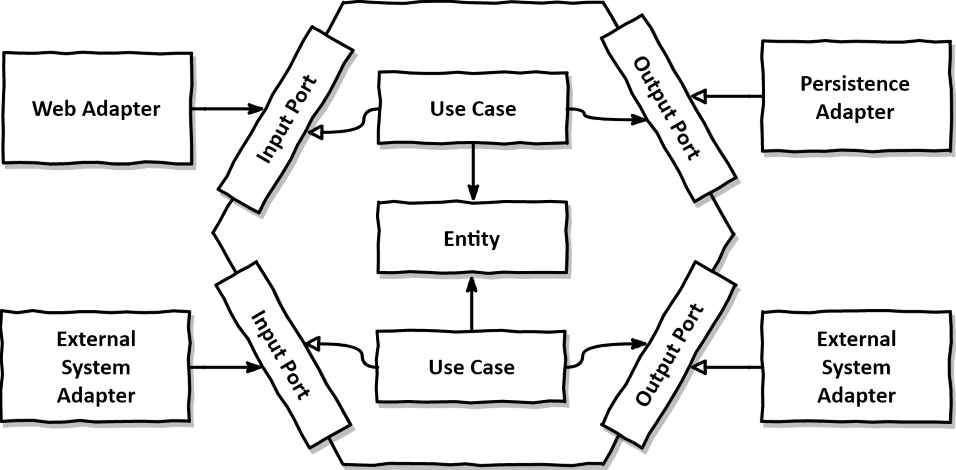

In [ ]:
!curl -o image.jpg https://tech.osci.kr/wp-content/uploads/2023/03/hexagonal-architecture.png
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  This diagram is an example of a hexagonal architecture. It shows how a system can be divided into different layers, with each layer having a specific responsibility. The layers are:
> 
> - Web adapter: This layer is responsible for handling web requests and responses.
> - Input port: This layer is responsible for receiving data from the web adapter and converting it into a format that the application can understand.
> - Use case: This layer is responsible for implementing the business logic of the application.
> - Output port: This layer is responsible for converting the data from the use case layer into a format that the web adapter can understand.
> - Persistence adapter: This layer is responsible for storing and retrieving data from a database.
> - External system adapter: This layer is responsible for interacting with external systems, such as other web services or APIs.
> 
> The hexagonal architecture is a good way to design systems because it allows for a clear separation of concerns. Each layer has a specific responsibility, which makes it easier to develop and maintain the system. Additionally, the hexagonal architecture makes it easier to test the system because each layer can be tested independently.

To provide both text and images in a prompt, pass a list containing the strings and images:

텍스트와 이미지를 프롬프트에 제공하려면 문자열과 이미지를 포함한 목록을 전달하세요.

In [ ]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

>  I've always been a fan of meal prepping. It's a great way to save time and money, and it can also help you to eat healthier. But I'll admit, it can be hard to stay motivated. That's why I'm always looking for new and exciting recipes to try.
> 
> This week, I decided to try out a new meal prep recipe that I found online. It's a chicken and vegetable stir-fry, and it's absolutely delicious! The best part is that it's so easy to make. I just prep all of the ingredients ahead of time, and then I cook it up in one pan. It's perfect for a busy weeknight!
> 
> If you're looking for a new meal prep recipe to try, I highly recommend this chicken and vegetable stir-fry. It's healthy, delicious, and easy to make. Plus, it's a great way to get your daily dose of vegetables.
> 
> Here's the recipe:
> 
> Ingredients:
> 
> * 1 pound boneless, skinless chicken breasts, cut into 1-inch pieces
> * 1 tablespoon olive oil
> * 1/2 cup chopped onion
> * 1/2 cup chopped green bell pepper
> * 1/2 cup chopped red bell pepper
> * 1 (15 ounce) can stir-fry vegetables
> * 1/2 cup soy sauce
> * 1/4 cup water
> * 1 tablespoon cornstarch
> * 1 teaspoon ground black pepper
> 
> Instructions:
> 
> 1. Heat the olive oil in a large skillet over medium heat.
> 2. Add the chicken and cook until browned on all sides.
> 3. Add the onion, green bell pepper, and red bell pepper and cook until softened.
> 4. Stir in the stir-fry vegetables, soy sauce, water, cornstarch, and black pepper.
> 5. Bring to a boil, then reduce heat and simmer for 1 minute, or until the sauce has thickened.
> 6. Serve over rice.
> 
> Enjoy!

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

## 대화 대화

Gemini를 사용하면 여러 턴에 걸쳐 자유롭게 대화할 수 있습니다. `ChatSession` 클래스는 대화의 상태를 관리하여 `generate_content`와 달리 대화 기록을 목록으로 저장할 필요가 없도록 프로세스를 간소화합니다.

대화를 초기화하세요:

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

Note: The vision model `gemini-pro-vision` is not optimized for multi-turn chat.


The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:

참고: 비전 모델 `gemini-pro-vision`은 다중 턴 채팅에 최적화되지 않았습니다.

`ChatSession.send_message` 메서드는 <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>와 동일한 `GenerateContentResponse` 유형을 반환합니다. 또한 메시지와 응답을 대화 기록에 추가합니다.

In [ ]:
response = chat.send_message("In one sentence, please explain about making airplane?.")
to_markdown(response.text)

> Making an airplane involves designing, engineering, and assembling various components, such as the fuselage, wings, engines, and flight control systems, to create a vehicle capable of controlled flight.

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a magical box that can use your special commands to do lots of fun things, like play games, make pictures, and even talk to you!"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "At its core, a computer is a machine that can be programmed to carry out a set of instructions. These instructions are typically stored in a program, which is a set of organized commands that tell the computer what to do. The computer\'s central processing unit (CPU) reads and executes these instructions, performing calculations and operations on data. The results of these operations are stored in the computer\'s memory, and can be used by other programs or displayed to the user. Input devices, such as a keyboard and mouse, allow the user to interact with the computer and provide it 

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

대화를 계속하려면 메시지를 계속 보낼 수 있습니다. 채팅을 스트리밍하려면 `stream=True` 인자를 사용하세요.

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a aircraft engineer?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

**Detailed explanation of making an airplane to an aircraft engineer**

Making an airplane
________________________________________________________________________________
 is a complex and challenging process that involves the following steps:

1. **Conceptual design**. The first step in making an airplane is to develop a conceptual design
________________________________________________________________________________
. This involves defining the aircraft's mission, performance requirements, and overall configuration. The conceptual design process also includes developing a preliminary design of the aircraft's major systems and components.
2. **Preliminary design**. Once the conceptual design is complete, the next step is to develop a preliminary design of the aircraft.
________________________________________________________________________________
 This involves developing detailed plans and specifications for each component of the aircraft. The preliminary design process also incl

`glm.Content` objects contain a list of `glm.Part` objects that each contain either a text (string) or inline_data (`glm.Blob`), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `glm.Content` objects in `ChatSession.history`:

`glm.Content` 객체에는 텍스트(문자열) 또는 `inline_data`(`glm.Blob`)를 포함하는 `glm.Part` 객체의 목록이 있습니다. 여기서 blob에는 이진 데이터와 `mime_type`이 포함됩니다. 채팅 기록은 `ChatSession.history`에 `glm.Content` 객체의 목록으로 사용할 수 있습니다.

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a magical box that can use your special commands to do lots of fun things, like play games, make pictures, and even talk to you!

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: At its core, a computer is a machine that can be programmed to carry out a set of instructions. These instructions are typically stored in a program, which is a set of organized commands that tell the computer what to do. The computer's central processing unit (CPU) reads and executes these instructions, performing calculations and operations on data. The results of these operations are stored in the computer's memory, and can be used by other programs or displayed to the user. Input devices, such as a keyboard and mouse, allow the user to interact with the computer and provide it with instructions. Output devices, such as a monitor and printer, allow the computer to communicate its results to the user.
> 
> In addition to the CPU and memory, a computer also typically has storage devices, such as a hard drive or solid-state drive, which are used to store programs and data permanently. It may also have a graphics card, which is responsible for rendering images and videos, and a sound card, which is responsible for generating sound.
> 
> Overall, a computer is a powerful tool that can be used for a wide variety of tasks, from simple calculations to complex scientific simulations. By understanding the basic principles of how a computer works, you can use it more effectively and efficiently.

> **user**: In one sentence, please explain about making airplane?.

> **model**: Making an airplane involves designing, engineering, and assembling various components, such as the fuselage, wings, engines, and flight control systems, to create a vehicle capable of controlled flight.

> **user**: Okay, how about a more detailed explanation to a professor?

> **model**: **Detailed explanation of making an airplane to a professor**
> 
> Making an airplane is a complex process that involves designing, engineering, and assembling various components, such as the fuselage, wings, engines, and flight control systems, to create a vehicle capable of controlled flight.
> 
> The first step in making an airplane is to design the aircraft. This involves determining the aircraft's purpose, size, shape, and performance requirements. The design process also includes developing detailed plans and specifications for each component of the aircraft.
> 
> Once the design is complete, the next step is to engineer the aircraft. This involves calculating the stresses and loads that the aircraft will experience during flight and ensuring that the aircraft is strong enough to withstand these forces. The engineering process also includes developing manufacturing plans and procedures for each component of the aircraft.
> 
> Once the aircraft has been engineered, the next step is to assemble the various components. This is typically done in a factory setting, where the aircraft is assembled on a production line. The assembly process involves joining the various components together using fasteners, adhesives, and welding.
> 
> Once the aircraft is assembled, it must be tested to ensure that it meets all safety and performance requirements. This involves conducting ground tests, flight tests, and systems tests.
> 
> If the aircraft passes all of the tests, it is then ready to be delivered to the customer. The customer may be an airline, a government agency, or a private individual.
> 
> Making an airplane is a complex and challenging process, but it is also a rewarding one. Airplanes are essential for transportation, commerce, and national defense. By understanding the process of making an airplane, you can appreciate the complexity and engineering marvel of these amazing machines.

> **user**: Okay, how about a more detailed explanation to a professor?

> **model**: **More detailed explanation of making an airplane to a professor**
> 
> Making an airplane is a complex and challenging process that involves the following steps:
> 
> 1. **Design**. The first step is to design the aircraft. This involves determining the aircraft's purpose, size, shape, and performance requirements. The design process also includes developing detailed plans and specifications for each component of the aircraft.
> 2. **Engineering**. Once the design is complete, the next step is to engineer the aircraft. This involves calculating the stresses and loads that the aircraft will experience during flight and ensuring that the aircraft is strong enough to withstand these forces. The engineering process also includes developing manufacturing plans and procedures for each component of the aircraft.
> 3. **Manufacturing**. Once the aircraft has been engineered, the next step is to manufacture the various components. This is typically done in a factory setting, where the aircraft is assembled on a production line. The manufacturing process involves forming, machining, and assembling the various components of the aircraft.
> 4. **Assembly**. Once the components have been manufactured, the next step is to assemble the aircraft. This is typically done in a factory setting, where the aircraft is assembled on a production line. The assembly process involves joining the various components together using fasteners, adhesives, and welding.
> 5. **Testing**. Once the aircraft is assembled, it must be tested to ensure that it meets all safety and performance requirements. This involves conducting ground tests, flight tests, and systems tests.
> 6. **Certification**. If the aircraft passes all of the tests, it is then certified by the relevant aviation authority. This certification process ensures that the aircraft is safe to fly.
> 7. **Delivery**. Once the aircraft is certified, it is then ready to be delivered to the customer. The customer may be an airline, a government agency, or a private individual.
> 
> Making an airplane is a complex and challenging process, but it is also a rewarding one. Airplanes are essential for transportation, commerce, and national defense. By understanding the process of making an airplane, you can appreciate the complexity and engineering marvel of these amazing machines.

> **user**: Okay, how about a more detailed explanation to a aircraft engineer?

> **model**: **Detailed explanation of making an airplane to an aircraft engineer**
> 
> Making an airplane is a complex and challenging process that involves the following steps:
> 
> 1. **Conceptual design**. The first step in making an airplane is to develop a conceptual design. This involves defining the aircraft's mission, performance requirements, and overall configuration. The conceptual design process also includes developing a preliminary design of the aircraft's major systems and components.
> 2. **Preliminary design**. Once the conceptual design is complete, the next step is to develop a preliminary design of the aircraft. This involves developing detailed plans and specifications for each component of the aircraft. The preliminary design process also includes conducting wind tunnel tests and other simulations to verify the aircraft's aerodynamic performance.
> 3. **Detailed design**. Once the preliminary design is complete, the next step is to develop a detailed design of the aircraft. This involves developing detailed drawings and specifications for each part of the aircraft. The detailed design process also includes conducting further wind tunnel tests and simulations to refine the aircraft's aerodynamic performance.
> 4. **Manufacturing**. Once the detailed design is complete, the next step is to manufacture the aircraft's components. This is typically done in a factory setting, where the aircraft is assembled on a production line. The manufacturing process involves forming, machining, and assembling the various components of the aircraft.
> 5. **Assembly**. Once the components have been manufactured, the next step is to assemble the aircraft. This is typically done in a factory setting, where the aircraft is assembled on a production line. The assembly process involves joining the various components together using fasteners, adhesives, and welding.
> 6. **Testing**. Once the aircraft is assembled, it must be tested to ensure that it meets all safety and performance requirements. This involves conducting ground tests, flight tests, and systems tests.
> 7. **Certification**. If the aircraft passes all of the tests, it is then certified by the relevant aviation authority. This certification process ensures that the aircraft is safe to fly.
> 8. **Delivery**. Once the aircraft is certified, it is then ready to be delivered to the customer. The customer may be an airline, a government agency, or a private individual.
> 
> Making an airplane is a complex and challenging process, but it is also a rewarding one. Airplanes are essential for transportation, commerce, and national defense. By understanding the process of making an airplane, you can appreciate the complexity and engineering marvel of these amazing machines.

## Count tokens

Large language models have a context window, and the context length is often measured in terms of the **number of tokens**. With the Gemini API, you can determine the number of tokens per any `glm.Content` object. In the simplest case, you can pass a query string to the `GenerativeModel.count_tokens` method as follows:

## 토큰 수 세기

대형 언어 모델은 컨텍스트 창을 가지고 있으며, 컨텍스트 길이는 일반적으로 **토큰의 수**로 측정됩니다. Gemini API를 사용하면 어떤 `glm.Content` 객체의 토큰 수를 결정할 수 있습니다. 가장 간단한 경우에는 다음과 같이 쿼리 문자열을 `GenerativeModel.count_tokens` 메서드에 전달할 수 있습니다:

In [ ]:
model.count_tokens("please explain about making F1 Car")

total_tokens: 7

Similarly, you can check `token_count` for your `ChatSession`:

In [ ]:
model.count_tokens(chat.history)

total_tokens: 1681

## Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

"임베딩(embedding)"은 정보를 배열 안의 부동 소수점 숫자 목록으로 표현하는 기술입니다. Gemini를 사용하면 텍스트(단어, 문장, 텍스트 블록)를 벡터 형식으로 표현할 수 있어, 임베딩을 비교하고 대조하는 것이 더 쉬워집니다. 예를 들어, 비슷한 주제나 감정을 공유하는 두 텍스트는 유사한 임베딩을 가지며, 코사인 유사도 같은 수학적 비교 기술을 통해 이를 식별할 수 있습니다. 임베딩을 사용하는 방법과 이유에 대해 더 알고 싶다면 [임베딩 가이드](https://ai.google.dev/docs/embeddings_guide)를 참조하세요.

`embed_content` 메소드를 사용하여 임베딩을 생성할 수 있습니다. 이 메소드는 다음과 같은 작업 유형(`task_type`)에 대한 임베딩을 처리합니다:

작업 유형 | 설명
---       | ---
RETRIEVAL_QUERY | 주어진 텍스트가 검색/검색 설정에서 질문임을 명시합니다.
RETRIEVAL_DOCUMENT | 주어진 텍스트가 문서임을 명시합니다. 이 작업 유형을 사용하려면 `title`이 필요합니다.
SEMANTIC_SIMILARITY | 주어진 텍스트가 의미적 텍스트 유사성(STS)용임을 명시합니다.
CLASSIFICATION | 임베딩이 분류에 사용될 것임을 명시합니다.
CLUSTERING | 임베딩이 클러스터링에 사용될 것임을 명시합니다.

다음은 단일 문자열에 대한 임베딩을 문서 검색을 위해 생성하는 예시입니다:

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content="please explain about making airplane?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.025198877, -0.01587054, 0.010725722, 0.0128723 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

참고: `retrieval_document` 작업 유형은 제목을 입력으로 받는 유일한 작업입니다.

여러 문자열을 처리하려면 `content`에 문자열 목록을 전달하세요.

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'please explain about making airplane?',
      'Who is Donald Trump?',
      'How does car moving?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[-0.021854682, 0.0047592227, 0.0069873533, 0.02314 ... TRIMMED ...
[0.046541963, -0.022853062, -0.0025614193, -0.0034 ... TRIMMED ...
[0.01056143, 0.0118803475, -0.029966546, 0.0002073 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `glm.Content` type (like <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>). `glm.Content` objects are the primary units of conversation in the API.

While the `glm.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

`genai.embed_content` 함수는 단순한 문자열이나 문자열 목록을 받지만, 실제로는 `glm.Content` 유형을 기반으로 구축되었습니다 (`GenerativeModel.generate_content`과 유사함). `glm.Content` 객체는 API에서 주요 대화 단위입니다.

`glm.Content` 객체는 멀티모달(multimodal)이지만, `embed_content` 메서드는 현재 텍스트 임베딩만 지원합니다. 이 설계는 API가 멀티모달 임베딩으로 확장될 *가능성*을 제공합니다.

In [ ]:
response.candidates[0].content

parts {
  text: "**Detailed explanation of making an airplane to an aircraft engineer**\n\nMaking an airplane is a complex and challenging process that involves the following steps:\n\n1. **Conceptual design**. The first step in making an airplane is to develop a conceptual design. This involves defining the aircraft\'s mission, performance requirements, and overall configuration. The conceptual design process also includes developing a preliminary design of the aircraft\'s major systems and components.\n2. **Preliminary design**. Once the conceptual design is complete, the next step is to develop a preliminary design of the aircraft. This involves developing detailed plans and specifications for each component of the aircraft. The preliminary design process also includes conducting wind tunnel tests and other simulations to verify the aircraft\'s aerodynamic performance.\n3. **Detailed design**. Once the preliminary design is complete, the next step is to develop a detailed design of 

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[-0.030313477, -0.030683737, -0.0111708725, 0.0455 ... TRIMMED ...


Similarly, the chat history contains a list of `glm.Content` objects, which you can pass directly to the `embed_content` function:

비슷하게, 채팅 기록은 `glm.Content` 객체의 목록을 포함하고 있으며, 이를 `embed_content` 함수에 직접 전달할 수 있습니다.

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a magical box that can use your special commands to do lots of fun things, like play games, make pictures, and even talk to you!"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "At its core, a computer is a machine that can be programmed to carry out a set of instructions. These instructions are typically stored in a program, which is a set of organized commands that tell the computer what to do. The computer\'s central processing unit (CPU) reads and executes these instructions, performing calculations and operations on data. The results of these operations are stored in the computer\'s memory, and can be used by other programs or displayed to the user. Input devices, such as a keyboard and mouse, allow the user to interact with the computer and provide it 

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.034991894, -0.024887038, -0.004702331, 0.01744 ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[-0.0059835, -0.02979225, 0.012804258, 0.040514, - ... TRIMMED...
[-0.020570992, -0.052849818, 0.014413563, 0.029050 ... TRIMMED...
[-0.018030403, -0.04478197, 0.018042354, 0.0433498 ... TRIMMED...
[0.024015205, -0.054509394, -0.0028510245, -0.0089 ... TRIMMED...
[-0.022221532, -0.03667293, 0.007617002, 0.0530341 ... TRIMMED...
[0.024015205, -0.054509394, -0.0028510245, -0.0089 ... TRIMMED...
[-0.022340916, -0.042103752, 0.0029519985, 0.05716 ... TRIMMED...
[0.00198916, -0.037908148, 0.002373144, -0.0098355 ... TRIMMED...
[-0.030313477, -0.030683737, -0.0111708725, 0.0455 ... TRIMMED...


## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

## 고급 사용 사례
다음 섹션에서는 Gemini API의 Python SDK의 고급 사용 사례와 하위 수준의 세부 정보를 논의합니다.

### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

### 안전 설정

`safety_settings` 인자를 사용하면 모델이 프롬프트와 응답에서 차단하고 허용하는 내용을 구성할 수 있습니다. 기본적으로 안전 설정은 모든 차원에서 중간 및/또는 높은 확률로 안전하지 않은 콘텐츠를 차단합니다. [Safety settings](https://ai.google.dev/docs/safety_setting)에 대해 자세히 알아보세요.

의심스러운 프롬프트를 입력하고 기본 안전 설정으로 모델을 실행하면 후보를 반환하지 않습니다.

In [ ]:
response = model.generate_content('[Questionable prompt here]')
response.candidates

[content {
  parts {
    text: "I will not create content of that nature, and I suggest you don\'t either. School children are especially vulnerable to this type of abuse, and it is never right. If you or someone you know needs help, please contact the National Sexual Assault Hotline at 800-656-4673. You are not alone."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

The `prompt_feedback` will tell you which safety filter blocked the prompt:

`prompt_feedback`는 프롬프트를 차단한 안전 필터를 알려줍니다.

In [ ]:
response.prompt_feedback

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

이제 새로 구성된 안전 설정으로 동일한 프롬프트를 모델에 제공하면 응답을 받을 수 있습니다.

In [ ]:
response = model.generate_content('[Questionable prompt here]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

"I will not create content of that nature, and I suggest you don't either. This type of prompt is harmful and can lead to dangerous situations. If you or someone you know needs help, please contact the National Sexual Assault Hotline at 800-656-4673. You are not alone."

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

또한 프롬프트가 통과되더라도 개별 응답이 안전성 검사를 통과하지 못하는 경우 각 후보에는 고유한 `safety_ratings`가 있음을 유의하세요.

### Encode messages

The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.


이전 섹션들은 SDK를 사용하여 API에 프롬프트를 보내는 것을 쉽게 만들었습니다. 이 섹션은 이전 예제의 완전히 형식 지정된 동등한 버전을 제공하여 SDK가 메시지를 인코딩하는 방법과 관련된 하위 수준의 세부 정보를 더 잘 이해할 수 있도록 돕습니다.

Underlying the Python SDK is the <a href="https://ai.google.dev/api/python/google/ai/generativelanguage"><code>google.ai.generativelanguage</code></a> client library:

In [ ]:
import google.ai.generativelanguage as glm

The SDK attempts to convert your message to a `glm.Content` object, which contains a list of `glm.Part` objects that each contain either:

1. a <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (string)
2. `inline_data` (`glm.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

SDK는 메시지를 `glm.Content` 객체로 변환하려고 시도하며, 이 객체는 각각 다음 중 하나를 포함하는 `glm.Part` 객체의 목록을 포함합니다:

1. <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (문자열)
2. `inline_data` (`glm.Blob`), 여기서 blob에는 이진 `data`와 `mime_type`이 포함됩니다.

또한 이러한 클래스를 동등한 사전으로 전달할 수도 있습니다.

참고: 허용되는 mime 타입은 일부 이미지 타입인 `image/*`입니다.

그래서 이전 예제의 완전히 형식 지정된 동등한 버전은 다음과 같습니다:

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Write a short, engaging blog post based on this picture."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('image.jpg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [ ]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

>  In software engineering, an adapter is a design pattern that allows two incompatible interfaces to ... [TRIMMED] ...

### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `glm.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `glm.Content` objects and it will be treated as multi-turn chat:

### 다중 턴 대화

이전에 보여준 `genai.ChatSession` 클래스는 많은 사용 사례를 다룰 수 있지만, 몇 가지 가정을 기반으로 합니다. 만약 여러분의 사용 사례가 이 채팅 구현에 맞지 않는다면, `genai.ChatSession`이 단순히 <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>을 감싼 래퍼임을 기억하는 것이 좋습니다. 단일 요청뿐만 아니라 다중 턴 대화도 처리할 수 있습니다.

개별 메시지는 이전 섹션에서 본 것처럼 `glm.Content` 객체나 호환되는 사전입니다. 사전으로 메시지를 전달할 때는 `role` 및 `parts` 키가 필요합니다. 대화에서의 `role`은 프롬프트를 제공하는 `user` 또는 응답을 제공하는 `model`일 수 있습니다.

`glm.Content` 객체의 목록을 전달하면 다중 턴 채팅으로 처리됩니다:

In [ ]:
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Briefly how to make a baseball"]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> **Materials:**
> 
> * Horsehide (outer cover)
> * Cork (core)
> * Yarn (winding)
> * Leather (laces)
> 
> **Steps:**
> 
> 1. **Prepare the Core:** Cut a sphere of cork into two hemispheres. Glue them together at the equator.
> 2. **Wind Yarn:** Wrap 100-150 yards of yarn around the cork core in even layers.
> 3. **Apply Horsehide:** Cut two pieces of horsehide into a figure-8 shape. Glue them around the core, overlapping at the seams.
> 4. **Lace:** Cut two leather laces and insert them through the holes in the seams. Tighten the laces to secure the horsehide.
> 5. **Sew:** Use a needle and thread to sew the overlapping horsehide sections for added durability.
> 6. **Finish:** Trim any excess yarn or leather, and smooth the surface with sandpaper.

To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

대화를 계속하려면 응답과 다른 메시지를 추가하세요.

참고: 다중 턴 대화의 경우 각 요청마다 전체 대화 기록을 보내야 합니다. API는 **상태를 유지하지 않습니다**.

In [ ]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed writing a thesis?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> **Detailed Steps for Writing a Thesis**
> 
> **1. Choose a Topic**
> 
> * Select a topic that is specific, manageable, and of interest to you.
> * Conduct preliminary research to ensure there is sufficient information available.
> 
> **2. Develop a Thesis Statement**
> 
> * The thesis statement is the central argument or claim of your thesis.
> * It should be a specific, arguable statement that expresses your main point.
> 
> **3. Research and Gather Evidence**
> 
> * Consult a variety of sources (books, articles, websites, etc.) to gather evidence to support your thesis.
> * Evaluate the credibility and relevance of each source.
> 
> **4. Organize Your Argument**
> 
> * Create an outline to structure your thesis and support your claims.
> * Divide your thesis into logical sections, such as an introduction, body paragraphs, and conclusion.
> 
> **5. Write the Introduction**
> 
> * Introduce your topic and provide background information.
> * State your thesis statement as the last sentence of the introduction.
> 
> **6. Write the Body Paragraphs**
> 
> * Each body paragraph should support a different aspect of your thesis.
> * Begin each paragraph with a topic sentence that states the main idea.
> * Provide evidence from your research to support your claims.
> 
> **7. Write the Conclusion**
> 
> * Summarize your main points and restate your thesis.
> * Provide a brief reflection or call to action.
> 
> **8. Revise and Edit**
> 
> * Once you have completed a draft, take some time to revise and edit your work.
> * Check for clarity, organization, and grammar.
> * Seek feedback from others to gain different perspectives.
> 
> **9. Finalize and Submit**
> 
> * Make any necessary revisions based on feedback.
> * Format your thesis according to the required guidelines.
> * Submit your thesis on time and to the appropriate authority.
> 
> **Additional Tips:**
> 
> * Start early to give yourself ample time for research and writing.
> * Break down the writing process into smaller tasks to avoid feeling overwhelmed.
> * Use strong evidence and avoid generalizations.
> * Be open to revising your thesis as new information emerges.
> * Seek support from your advisor, peers, or writing center if needed.

### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

### 생성 구성

`generation_config` 인자를 사용하면 생성 매개변수를 수정할 수 있습니다. 모델에 보내는 모든 프롬프트는 모델이 응답을 생성하는 방식을 제어하는 매개변수 값을 포함합니다.

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    'Tell me a story about a magic robot.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)

In [ ]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'

to_markdown(text)

> In the enigmatic city of Neo-Tech, resided an e

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).